# Plot Scores for Columns of MSA

## Import and Clean Data

In [68]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR48082\P0ABB0_ortholog_msa_scores3.data"

df = pd.read_csv(in_fh)

In [66]:
# remove columns with no information
df_clean = df[df.Identity != 'X']


print(len(df_clean), "columns used in analysis.\n")
print(df_clean.shape)

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes

372 columns used in analysis.

(372, 8)


## Distributions of Each Score

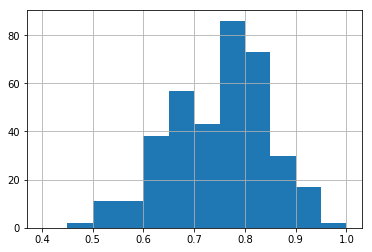

In [14]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

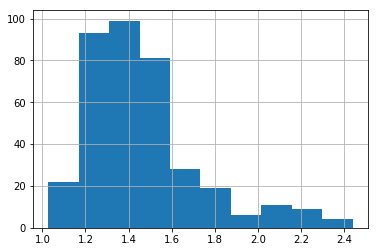

In [20]:
df_clean['Avg Frequency Ratio'].hist();

significantly higher conservation than in other high and middle disorder

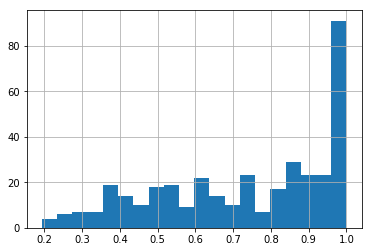

In [15]:
df_clean['Percent Identity'].hist(bins = 20);

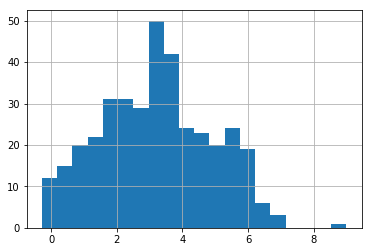

In [16]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

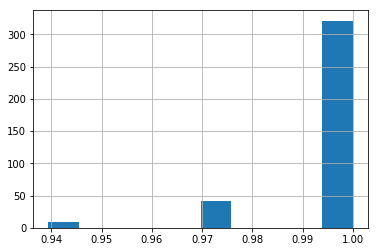

In [17]:
df_clean['Fraction Aligned'].hist();

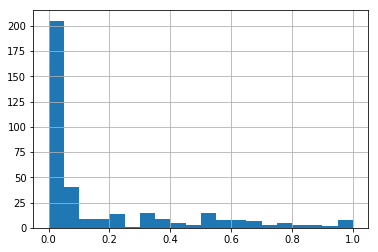

In [18]:
df_clean['Fraction Disordered'].hist(bins = 20);

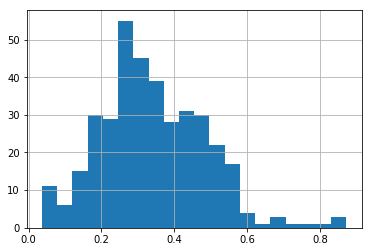

In [19]:
df_clean['Avg Disorder Strength'].hist(bins = 20);

no column where, on avg, codon freq is lower than expected

## Plot Column Scores

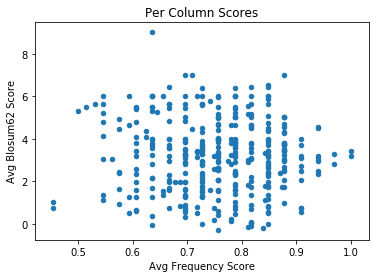

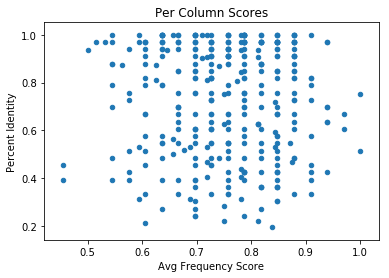

In [21]:
# matplotlib backend to plot dataframe columns
df_clean.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores');

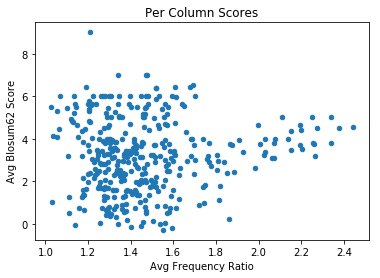

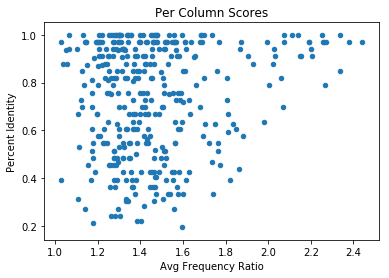

In [22]:
df_clean.plot.scatter('Avg Frequency Ratio', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Frequency Ratio', 'Percent Identity', title='Per Column Scores');

Fraction Disorder Split at 50% for same scores above

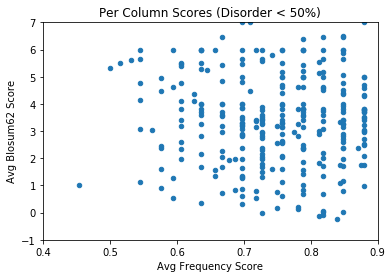

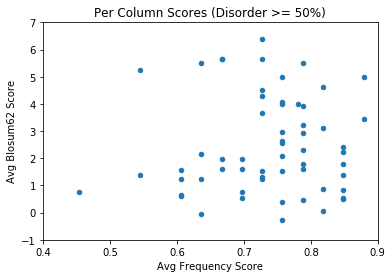

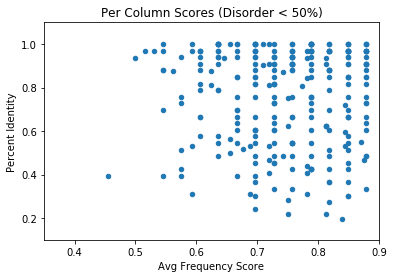

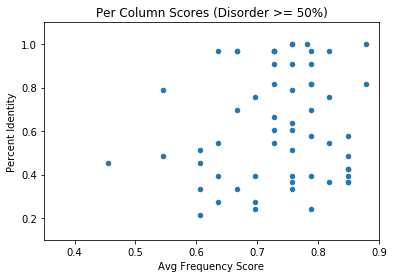

In [23]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

df_clean_dis1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_dis1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1]);

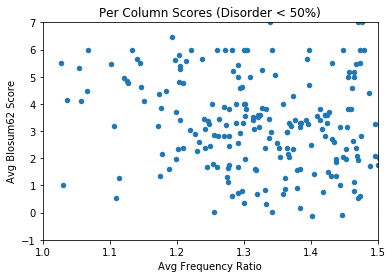

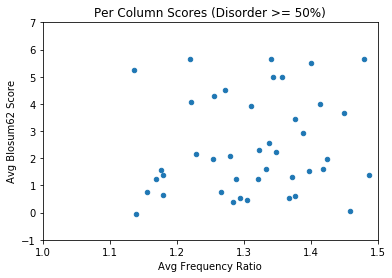

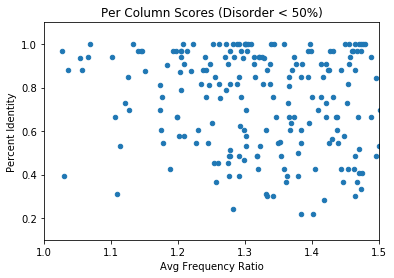

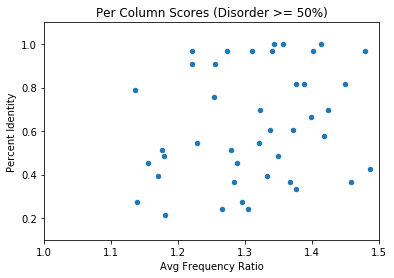

In [25]:
df_clean_dis1.plot.scatter('Avg Frequency Ratio', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([-1, 7])
df_clean_dis2.plot.scatter('Avg Frequency Ratio', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([-1, 7])
df_clean_dis1.plot.scatter('Avg Frequency Ratio', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([0.1, 1.1])
df_clean_dis2.plot.scatter('Avg Frequency Ratio', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([0.1, 1.1]);

Split at 50% Disorder Strength for same scores above (no diff as expected)

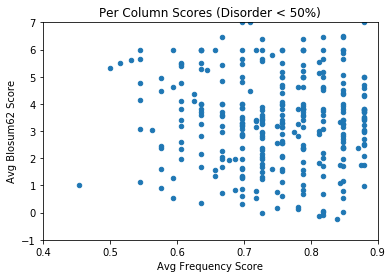

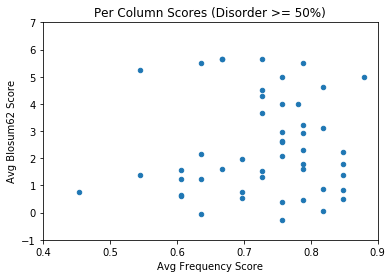

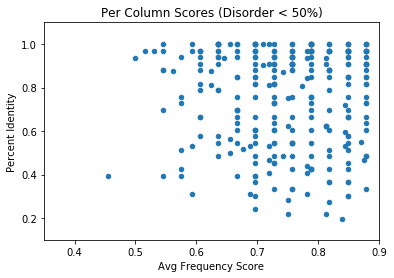

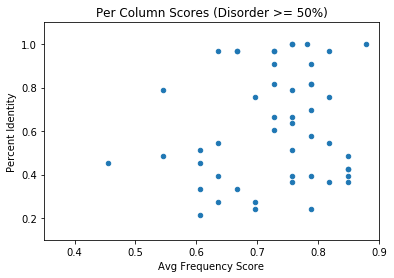

In [26]:
df_clean_strength1 = df_clean[df_clean['Avg Disorder Strength'] < 0.5]
df_clean_strength2 = df_clean[df_clean['Avg Disorder Strength'] >= 0.5]

df_clean_strength1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_strength2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_strength1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1])
df_clean_strength2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1]);

ratio and score very different, plot those with dis strength?

Attempting to filter by fraction aligned produced no differences (maybe shrink size of window)

In [27]:
print(min(df_clean['Fraction Aligned']))

0.9393939393939394


In [28]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [29]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [30]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [31]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio
348,N,0.333333,0.596591,0.606061,1.000000,1.000000,0.871606,1.376924
349,A,0.272727,-0.060606,0.636364,1.000000,1.000000,0.847689,1.139466
350,E,0.363636,0.409091,0.757576,1.000000,1.000000,0.853068,1.283827
351,E,0.909091,4.297348,0.727273,1.000000,1.000000,0.810870,1.254912
352,I,0.818182,2.920455,0.787879,1.000000,1.000000,0.772662,1.388267
353,S,0.606061,1.316288,0.727273,1.000000,0.878788,0.679149,1.371692
354,E,0.242424,0.753788,0.696970,1.000000,0.787879,0.583898,1.265242
2169,A,0.363636,0.070076,0.818182,1.000000,0.606061,0.511284,1.458275
2170,G,0.666667,2.147727,0.727273,1.000000,0.393939,0.437340,1.365940
2171,E,0.939394,4.460227,0.575758,1.000000,0.181818,0.380572,1.065267


## Distribution of Each Score Split at 50% Fraction Disorder

Not redoing with disorder strength since population changes were marginal compared to fraction disorder

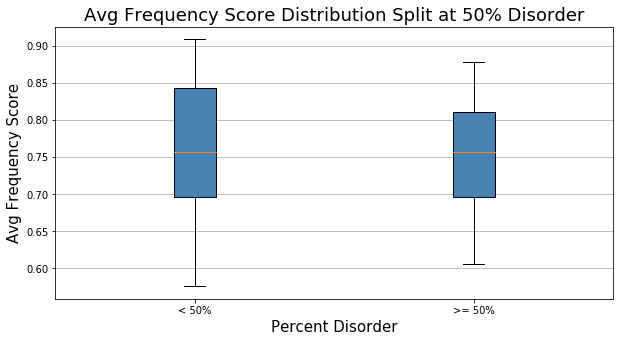

In [44]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split at 50% Disorder', fontsize=18);


Using Freq ratio (virtually no different between groups, as seen with score above)

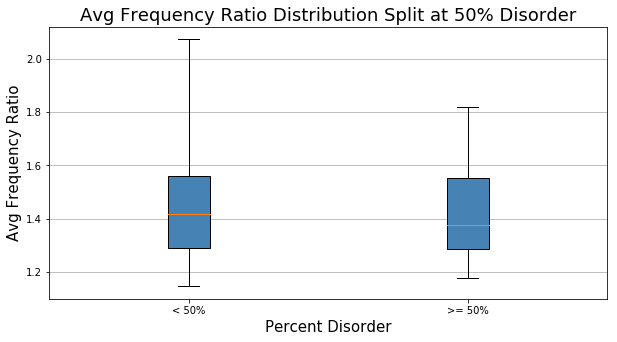

In [45]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Ratio"], df_clean_dis2["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Ratio", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Ratio Distribution Split at 50% Disorder', fontsize=18);


as disorder increases, conservation decreases (seen in both below, should t-test)

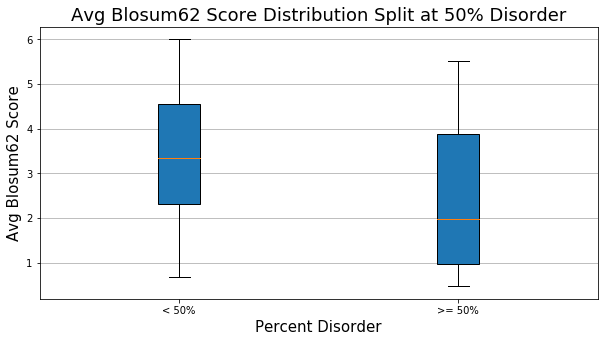

In [46]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Avg Blosum62 Score', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split at 50% Disorder', fontsize=18);

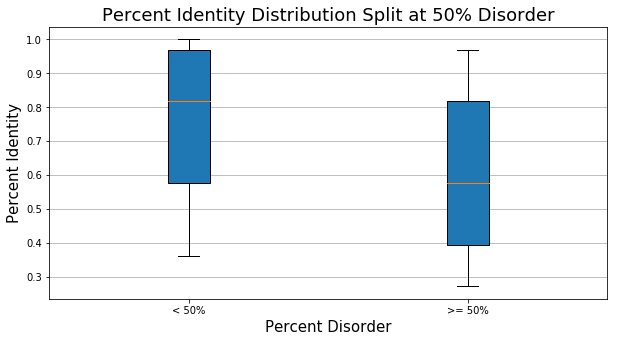

In [47]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Percent Identity', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split at 50% Disorder', fontsize=18);

## Plot Scores as a Function of Disorder

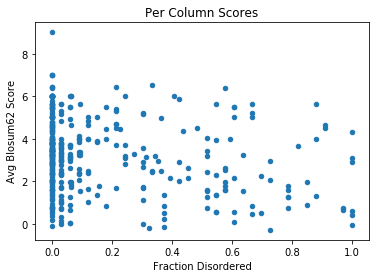

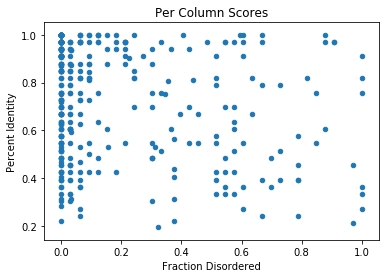

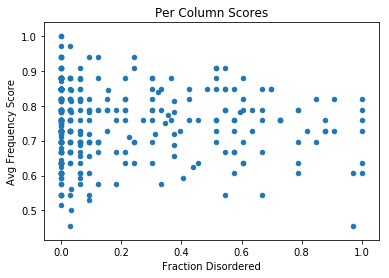

In [48]:
df_clean.plot.scatter('Fraction Disordered', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Avg Frequency Score', title='Per Column Scores');

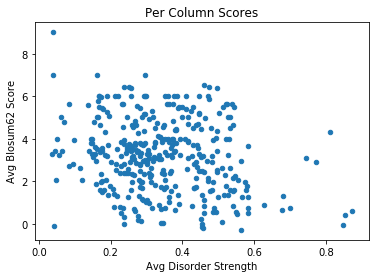

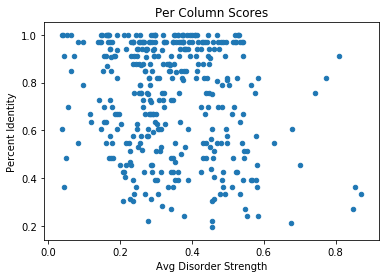

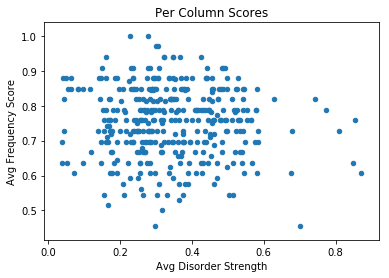

In [49]:
df_clean.plot.scatter('Avg Disorder Strength', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Disorder Strength', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Avg Disorder Strength', 'Avg Frequency Score', title='Per Column Scores');

## Fraction Disorder Filters

In [69]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

277

In [70]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

33

In [71]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

41

In [72]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

21

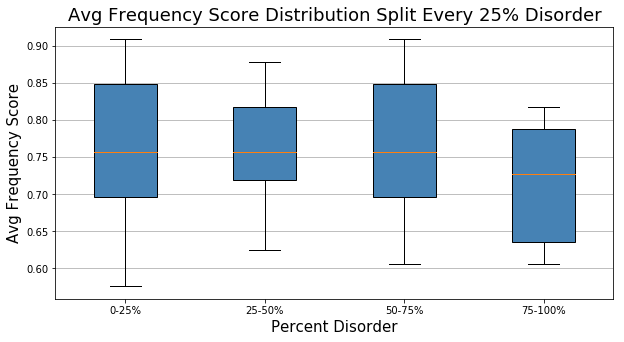

In [73]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Score"], df_clean_50d["Avg Frequency Score"], df_clean_75d["Avg Frequency Score"],
                       df_clean_100d["Avg Frequency Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split Every 25% Disorder', fontsize=18);


no diff in ratio vs score, highest disorder has lowest avg freq

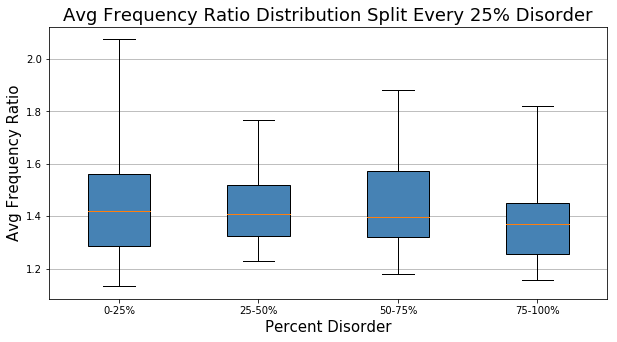

In [74]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Ratio"], df_clean_50d["Avg Frequency Ratio"], df_clean_75d["Avg Frequency Ratio"],
                       df_clean_100d["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Ratio", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Ratio Distribution Split Every 25% Disorder', fontsize=18);


disorder increases conservation decreases

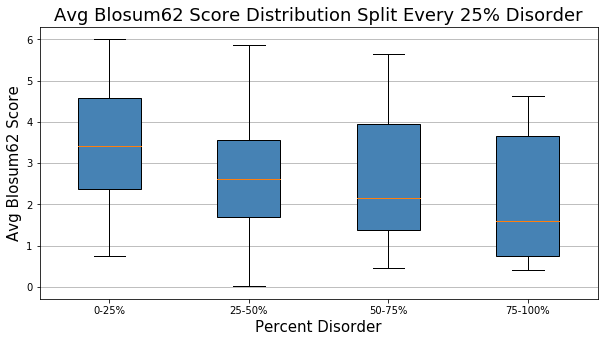

In [75]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Blosum62 Score"], df_clean_50d["Avg Blosum62 Score"], df_clean_75d["Avg Blosum62 Score"],
                       df_clean_100d["Avg Blosum62 Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Blosum62 Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split Every 25% Disorder', fontsize=18);


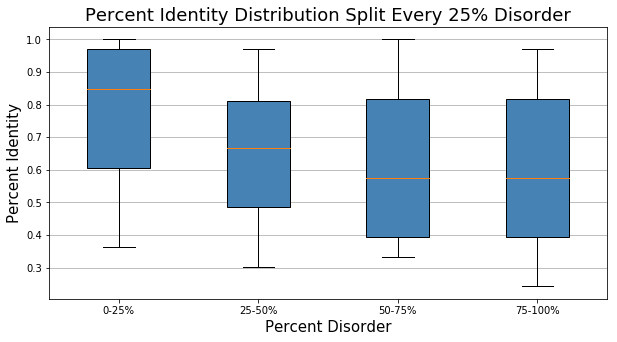

In [76]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Percent Identity"], df_clean_50d["Percent Identity"], df_clean_75d["Percent Identity"],
                       df_clean_100d["Percent Identity"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Percent Identity", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split Every 25% Disorder', fontsize=18);


## Disorder Strength Filters

In [54]:
df_clean_25d = df_clean[df_clean['Avg Disorder Strength'] <= 0.25]
len(df_clean_25d)

96

In [55]:
df_clean_50d = df_clean[(df_clean['Avg Disorder Strength'] <= 0.50) & (df_clean['Avg Disorder Strength'] > 0.25)]
len(df_clean_50d)

227

In [56]:
df_clean_75d = df_clean[(df_clean['Avg Disorder Strength'] <= 0.75) & (df_clean['Avg Disorder Strength'] > 0.50)]
len(df_clean_75d)

44

In [57]:
df_clean_100d = df_clean[(df_clean['Avg Disorder Strength'] <= 1.0) & (df_clean['Avg Disorder Strength'] > 0.75)]
len(df_clean_100d)

5

Score distributions split by 25% using strength

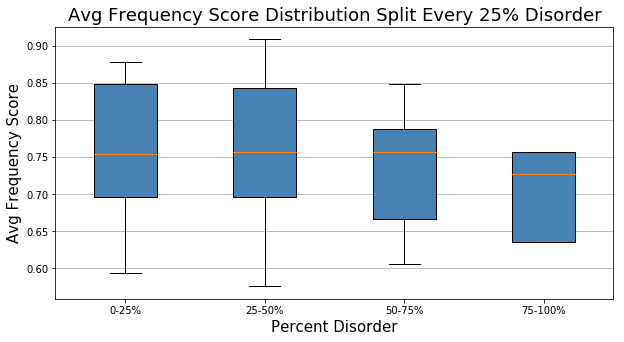

In [58]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Score"], df_clean_50d["Avg Frequency Score"], df_clean_75d["Avg Frequency Score"],
                       df_clean_100d["Avg Frequency Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split Every 25% Disorder', fontsize=18);


no diff in ratio vs score, highest disorder has lowest avg freq

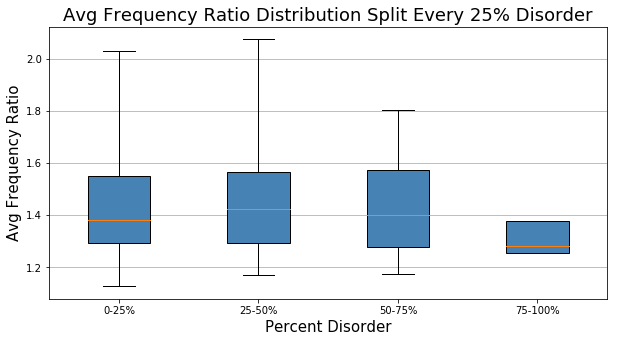

In [59]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Ratio"], df_clean_50d["Avg Frequency Ratio"], df_clean_75d["Avg Frequency Ratio"],
                       df_clean_100d["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Ratio", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Ratio Distribution Split Every 25% Disorder', fontsize=18);


disorder increases conservation decreases

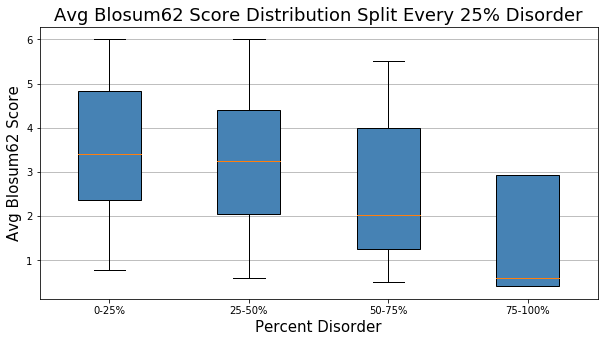

In [62]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Blosum62 Score"], df_clean_50d["Avg Blosum62 Score"], df_clean_75d["Avg Blosum62 Score"],
                       df_clean_100d["Avg Blosum62 Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Blosum62 Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split Every 25% Disorder', fontsize=18);


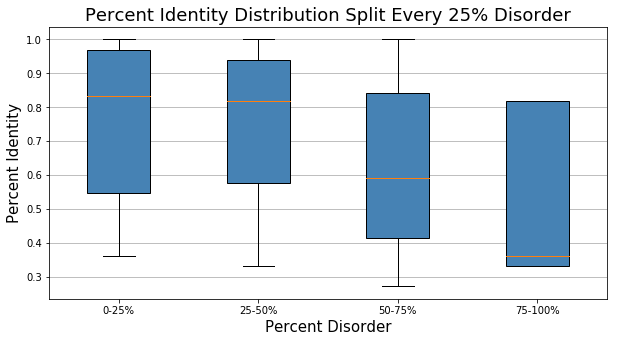

In [63]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Percent Identity"], df_clean_50d["Percent Identity"], df_clean_75d["Percent Identity"],
                       df_clean_100d["Percent Identity"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Percent Identity", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split Every 25% Disorder', fontsize=18);
